# Title & Introduction

## Winter Fashion Trends: Full EDA Report
### A Data-Driven Story

**Introduction**
Welcome to a comprehensive analysis of the Winter Fashion market. In this report, we dig deep into the dataset to uncover patterns in pricing, customer preferences, and market trends.

We will answer critical questions:
1. **Price Drivers:** What makes an item expensive?
2. **Customer Taste:** What do people actually rate highly?
3. **Market Segmentation:** Who buys what, and which brands dominate specific styles?

---

# Setup & Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. Environment Setup
warnings.filterwarnings('ignore')

# 2. Visual Theme (Winter Palette)
sns.set(style="whitegrid", rc={"axes.facecolor": "#f0f4f8", "figure.facecolor": "#ffffff"})
winter_palette = sns.color_palette("mako")
main_color = winter_palette[2]

# 3. Load Dataset
Data = pd.read_csv('/kaggle/input/winter-fashoin-trends')

# 4. Data Cleaning
# Remove ID column safely (if it exists)
if 'ID' in Data.columns:
    Data = Data.drop('ID', axis=1)

print("Data Loaded Successfully.")
print(f"Data Shape: {Data.shape}")

Data Loaded Successfully.
Data Shape: (150, 11)


# Data Overview

In [ ]:
print('----------------\nDataset Preview (First 5 Rows):\n')
display(Data.head())

print('\n----------------\nDataset Preview (Last 5 Rows):\n')
display(Data.tail())

print('\n----------------\nData Information:\n')
Data.info()

print("\n----------------\nMissing Values & Duplicates Summary:\n")
messy_data = Data.isnull().sum().to_frame('Null Count')
print(f"Total Duplicated Rows: {Data.duplicated().sum()}")
if messy_data['Null Count'].sum() > 0:
    display(messy_data[messy_data['Null Count'] > 0])
else:
    print("No missing values detected.")

----------------
Dataset Preview (First 5 Rows):



,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
0,Adidas,Gloves,Brown,Polyester,Streetwear,Women,Winter 2025,244.06,6.0,4.9,Trending
1,Gucci,Gloves,Red,Leather,Sporty,Men,Winter 2023,366.73,8.8,3.3,Trending
2,H&M,Coat,Brown,Fleece,Streetwear,Unisex,Winter 2025,741.55,4.8,3.5,Trending
3,North Face,Coat,Blue,Cashmere,Formal,Men,Winter 2024,116.09,7.5,3.1,Outdated
4,Mango,Thermal,Blue,Cashmere,Formal,Unisex,Winter 2025,193.16,7.8,4.3,Outdated



----------------
Dataset Preview (Last 5 Rows):



,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
145,Mango,Coat,Green,Down,Casual,Women,Winter 2024,614.06,2.9,4.5,Emerging
146,H&M,Jacket,Gray,Polyester,Formal,Unisex,Winter 2023,329.70,3.0,4.4,Outdated
147,Uniqlo,Jacket,Gray,Leather,Casual,Unisex,Winter 2024,411.84,9.7,4.7,Outdated
148,Prada,Beanie,Black,Wool,Formal,Unisex,Winter 2025,407.11,3.5,3.0,Classic
149,Gucci,Gloves,Red,Down,Luxury,Men,Winter 2024,256.39,7.3,3.6,Outdated



----------------
Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             150 non-null    object 
 1   Category          150 non-null    object 
 2   Color             150 non-null    object 
 3   Material          150 non-null    object 
 4   Style             150 non-null    object 
 5   Gender            150 non-null    object 
 6   Season            150 non-null    object 
 7   Price(USD)        150 non-null    float64
 8   Popularity_Score  150 non-null    float64
 9   Customer_Rating   150 non-null    float64
 10  Trend_Status      150 non-null    object 
dtypes: float64(3), object(8)
memory usage: 13.0+ KB

----------------
Missing Values & Duplicates Summary:

Total Duplicated Rows: 0
No missing values detected.


# Statistical Summary

In [ ]:
# Numerical Summary
print("Numerical Statistics:")
display(Data.describe().T)

# Categorical Summary
print("\nCategorical Statistics:")
display(Data.describe(include='object').T)

Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
Price(USD),150.0,443.105933,211.630074,30.07,292.8075,445.82,631.5375,788.03
Popularity_Score,150.0,5.763333,2.655763,1.10,3.4000,5.85,8.2250,10.00
Customer_Rating,150.0,3.802667,0.719428,2.50,3.1250,3.80,4.4000,5.00



Categorical Statistics:


,count,unique,top,freq
Brand,150,10,Mango,25
Category,150,10,Scarf,23
Color,150,10,Beige,24
Material,150,7,Cotton,29
Style,150,5,Sporty,34
Gender,150,3,Unisex,55
Season,150,3,Winter 2025,56
Trend_Status,150,4,Outdated,50


# Univariate Analysis (Categorical)

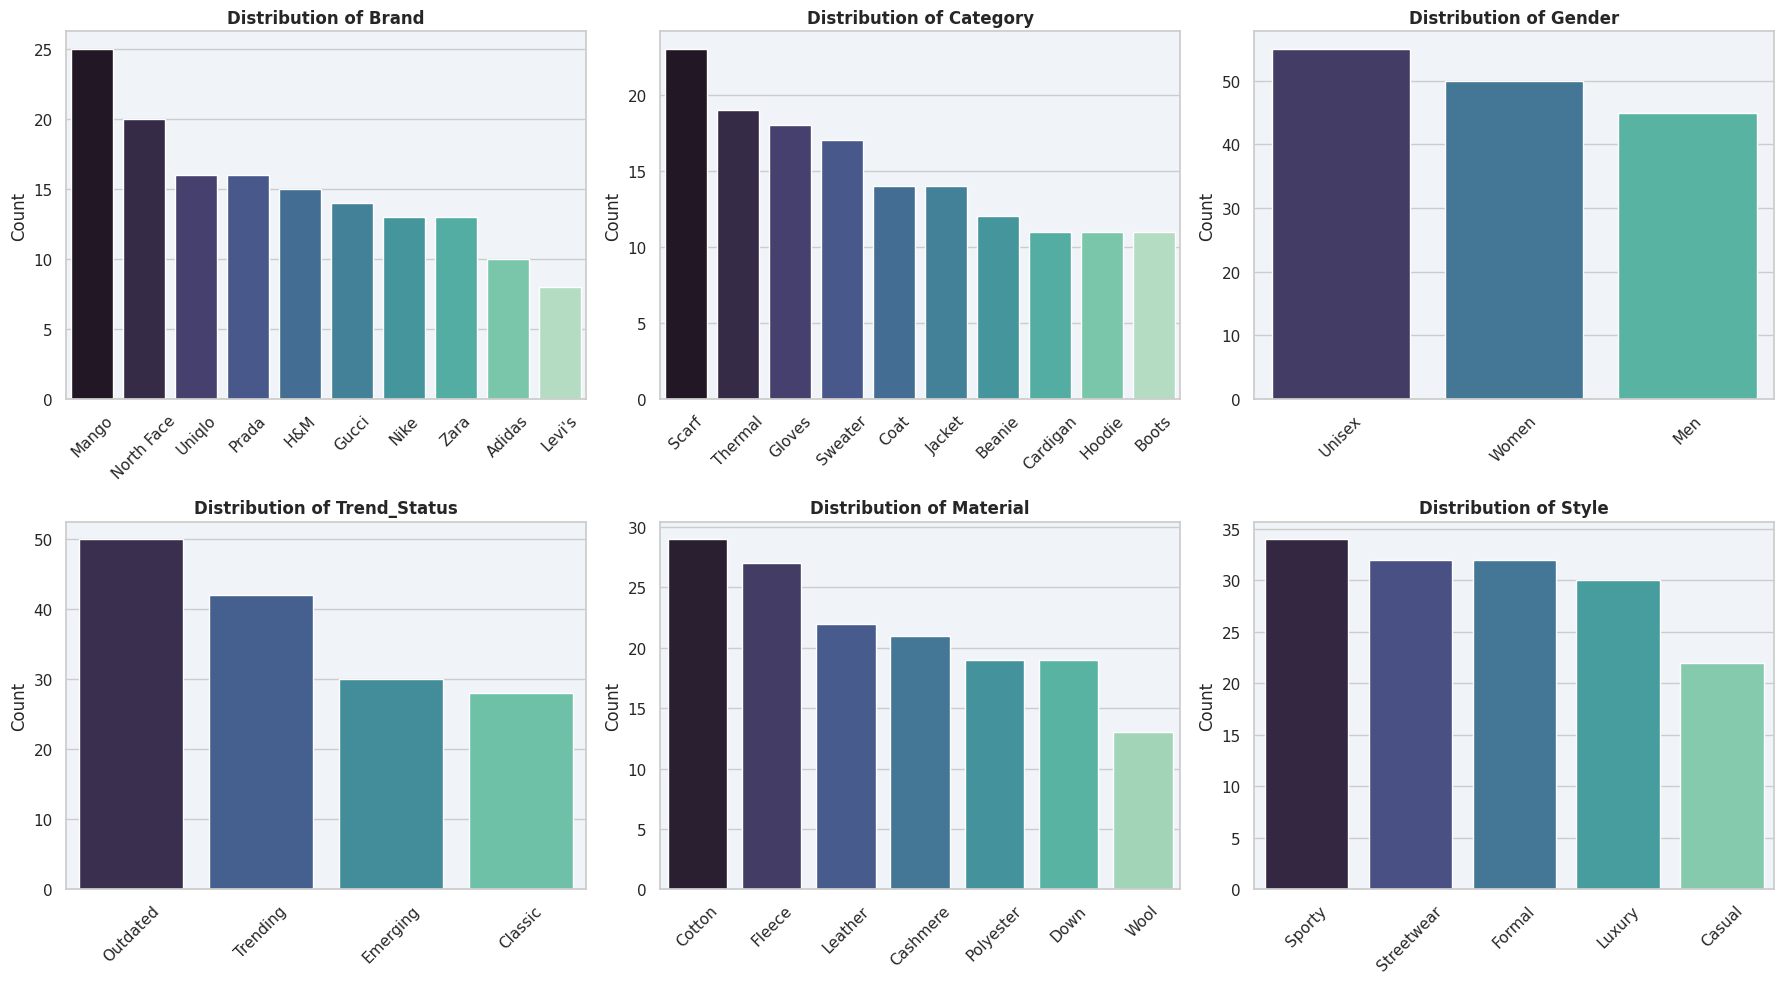

In [ ]:
cols = ['Brand', 'Category', 'Gender', 'Trend_Status', 'Material', 'Style']

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=Data, x=col, order=Data[col].value_counts().index, palette='mako')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Univariate Analysis (Numerical)

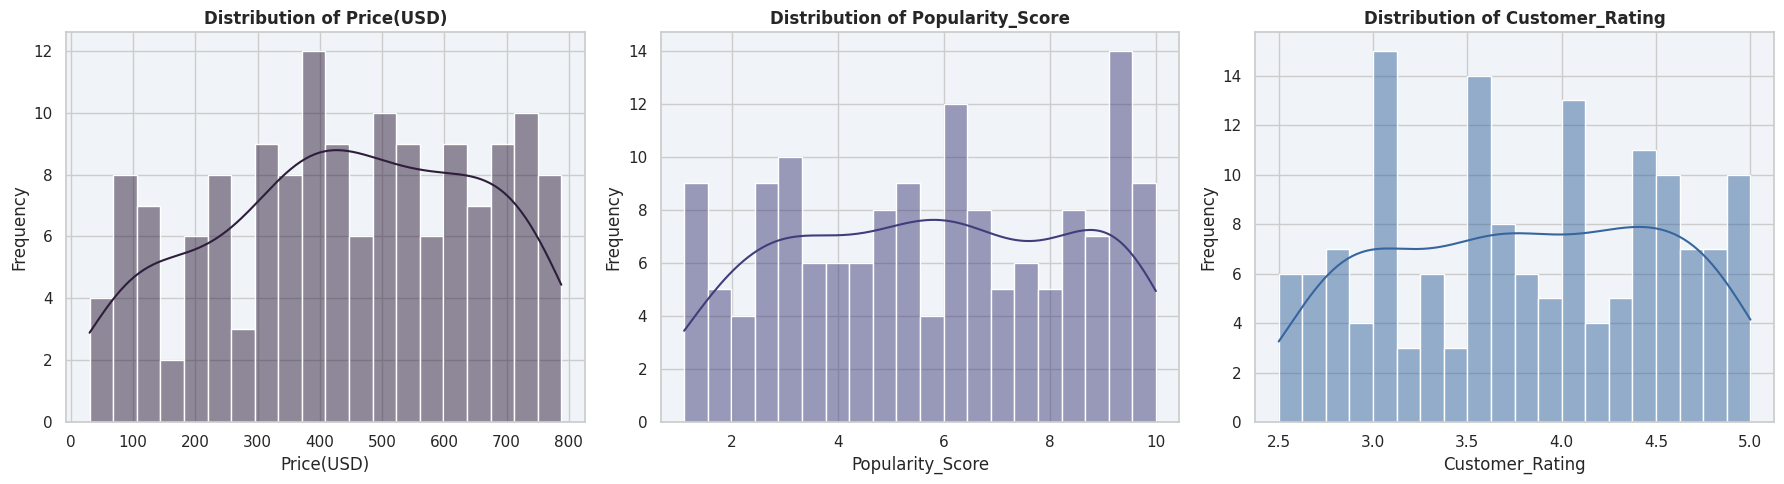

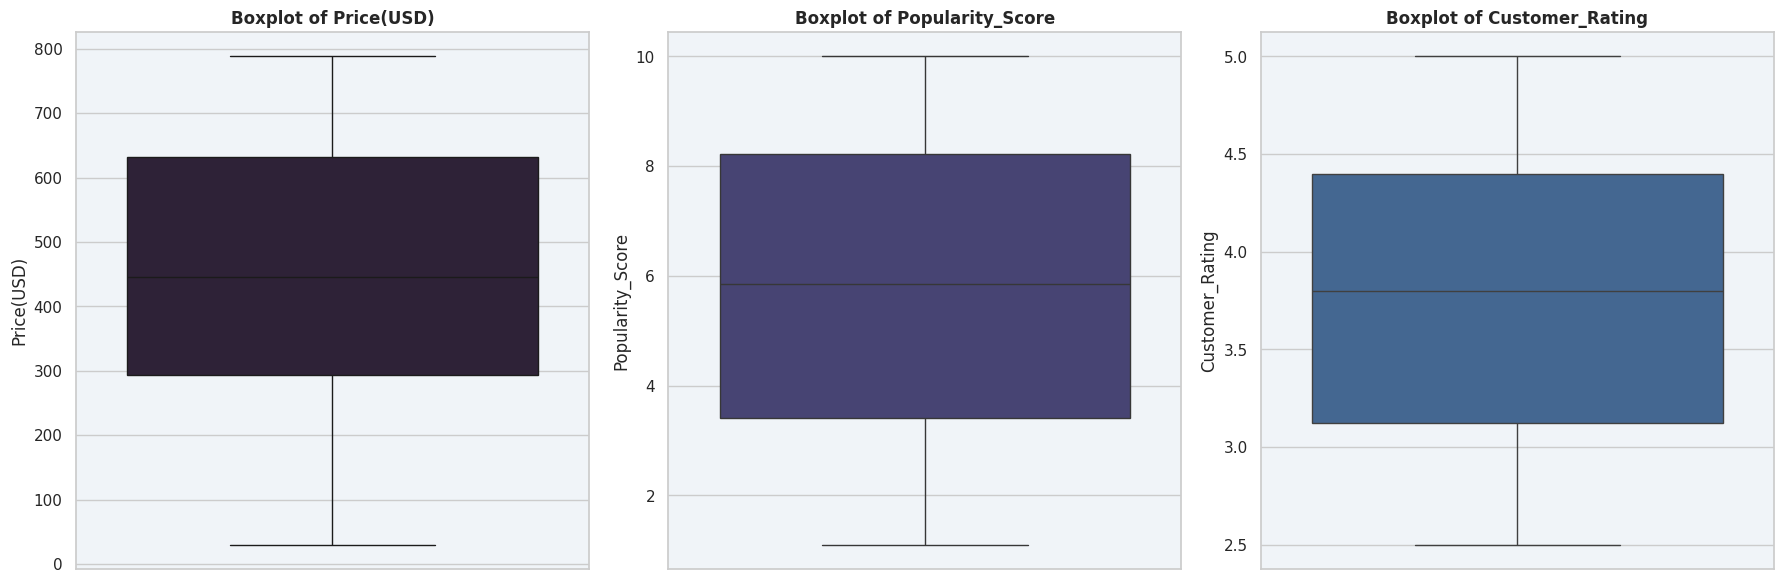

In [ ]:
# 1. Histograms
plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols, 0):
    plt.subplot(1, 3, i+1)
    sns.histplot(Data[col], kde=True, bins=20, color=winter_palette[i], edgecolor='white')
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Boxplots
plt.figure(figsize=(18, 6))
for i, col in enumerate(num_cols, 0):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=Data, y=col, color=winter_palette[i])
    plt.title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Price Analysis

##  What Drives the Price? (Bivariate Analysis)
In this section, we analyze how Brand, Material, Category, and Trends influence the pricing strategy.

##Price Relationships

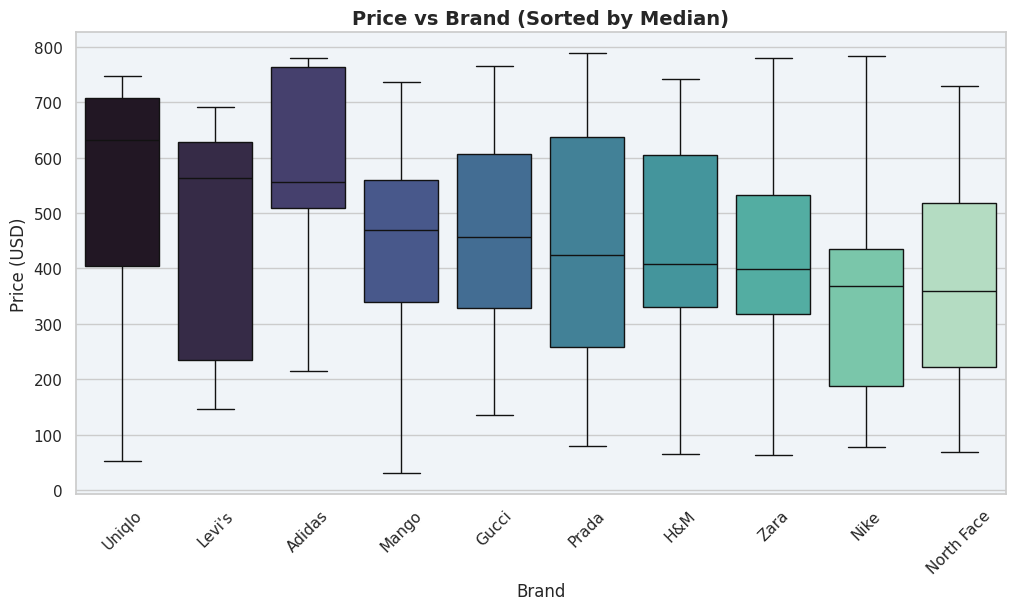

In [ ]:
# 1. Price vs Brand
brand_order = Data.groupby('Brand')['Price(USD)'].median().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=Data, x='Brand', y='Price(USD)', order=brand_order, palette='mako')
plt.xticks(rotation=45)
plt.title('Price vs Brand (Sorted by Median)', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD)')
plt.show()


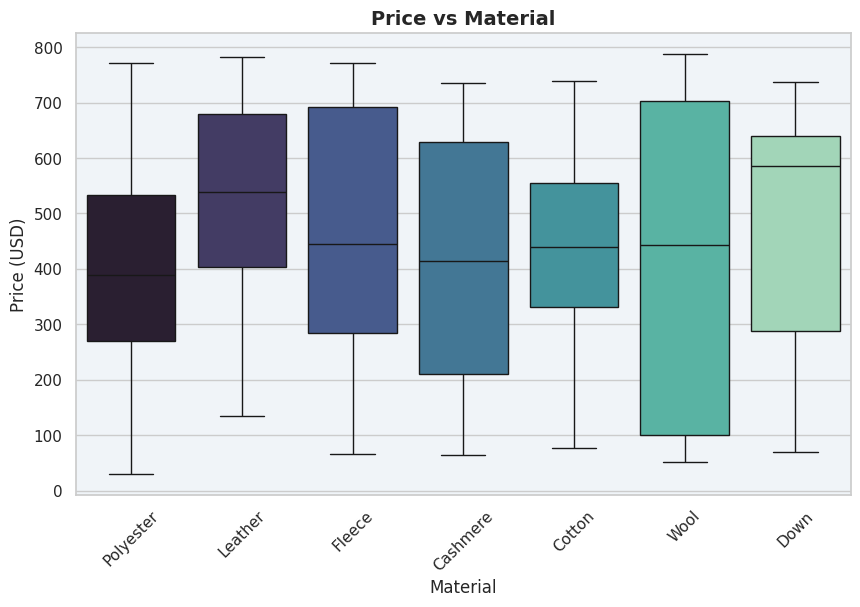

In [ ]:
# 2. Price vs Material
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='Material', y='Price(USD)', palette='mako')
plt.xticks(rotation=45)
plt.title('Price vs Material', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD)')
plt.show()


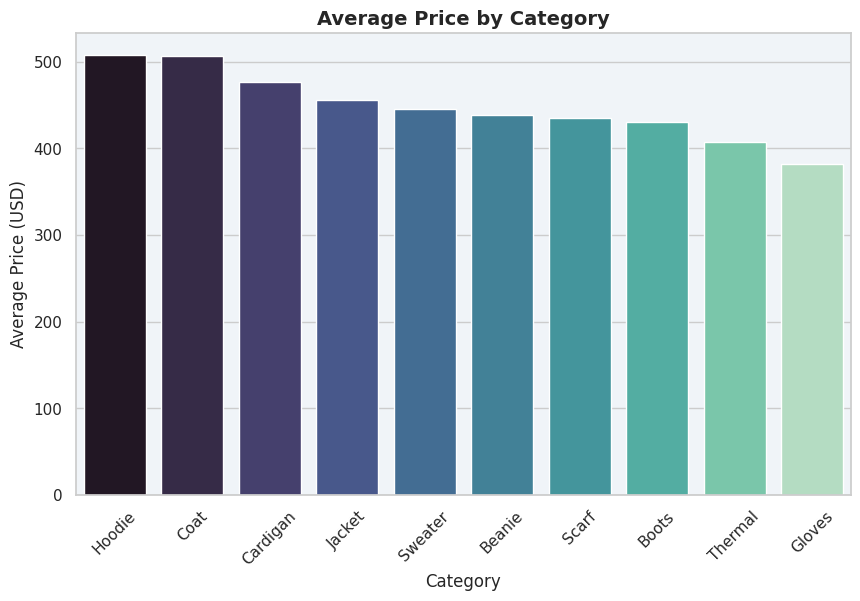

In [ ]:
# 3. Price vs Category (Barplot)
plt.figure(figsize=(10, 6))
category_order = Data.groupby('Category')['Price(USD)'].mean().sort_values(ascending=False).index
sns.barplot(data=Data, x='Category', y='Price(USD)', order=category_order, palette='mako', errorbar=None)
plt.xticks(rotation=45)
plt.title('Average Price by Category', fontsize=14, fontweight='bold')
plt.ylabel('Average Price (USD)')
plt.show()

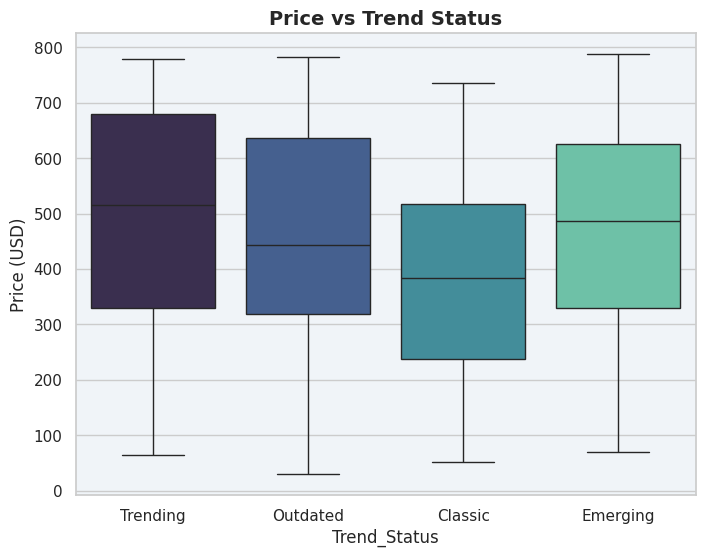

In [ ]:
# 4. Price vs Trend Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=Data, x='Trend_Status', y='Price(USD)', palette='mako')
plt.title('Price vs Trend Status', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD)')
plt.show()

# Customer Preferences

## What Do People Like?
Here we analyze Customer Ratings and Popularity to understand what satisfies the market.

##Ratings & Popularity

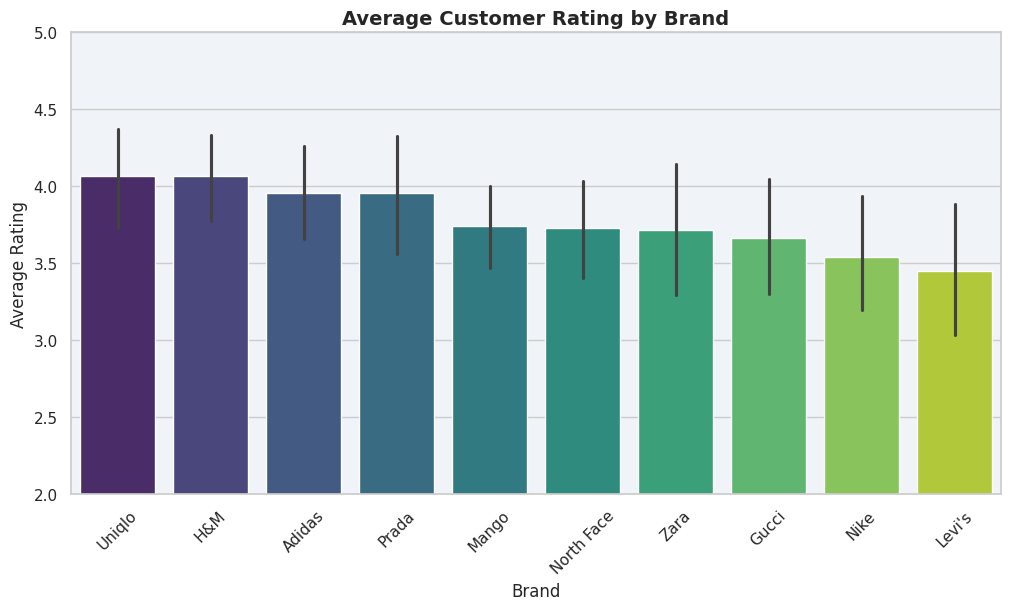

In [ ]:
# 1. Rating vs Brand
brand_order_rating = Data.groupby('Brand')['Customer_Rating'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(data=Data, x='Brand', y='Customer_Rating', order=brand_order_rating, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Customer Rating by Brand', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating')
plt.ylim(2, 5) # Better visualization scale
plt.show()


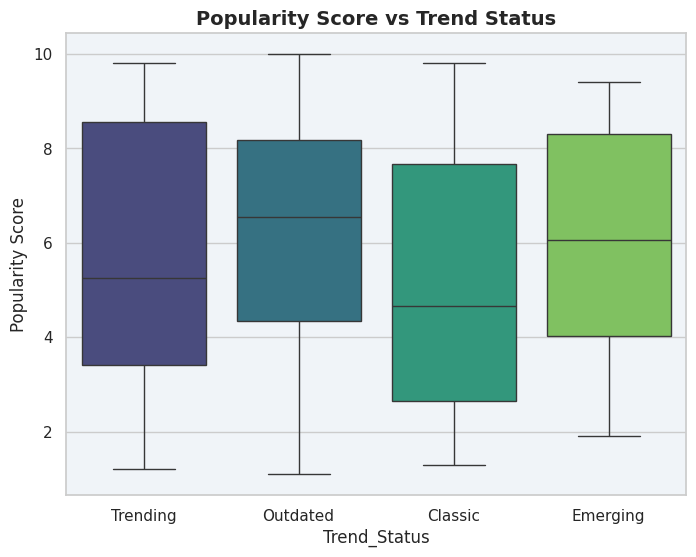

In [ ]:
# 2. Popularity vs Trend Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=Data, x='Trend_Status', y='Popularity_Score', palette='viridis')
plt.title('Popularity Score vs Trend Status', fontsize=14, fontweight='bold')
plt.ylabel('Popularity Score')
plt.show()

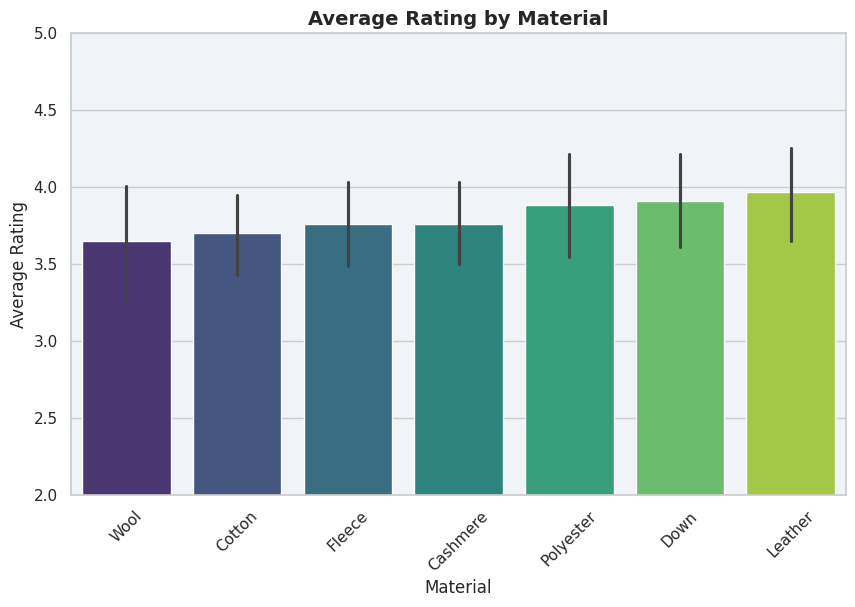

In [ ]:
# 3. Rating vs Material
material_order_rating = Data.groupby('Material')['Customer_Rating'].mean().sort_values().index
plt.figure(figsize=(10, 6))
sns.barplot(data=Data, x='Material', y='Customer_Rating', order=material_order_rating, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Rating by Material', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating')
plt.ylim(2, 5)
plt.show()

# Market Distribution

## Market Segmentation
Who buys what? Visualizing the mix of Brands, Trends, Genders, and Categories.

##Segmentation Visualization

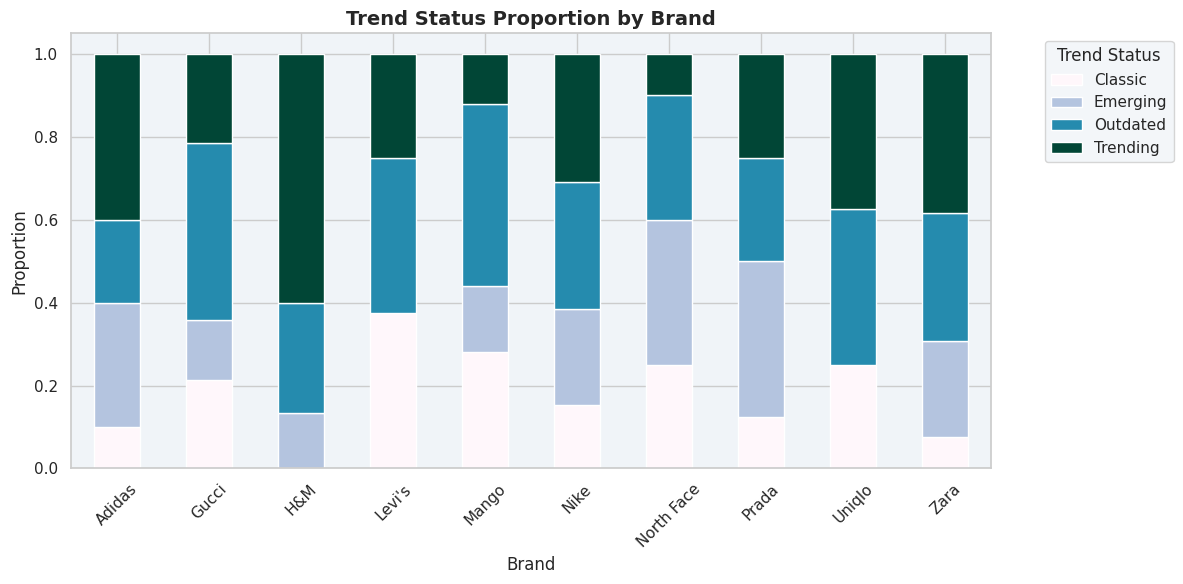

In [ ]:
# 1. Brand vs Trend Status (Stacked Bar Chart)
brand_trend = pd.crosstab(Data['Brand'], Data['Trend_Status'])
brand_trend_pct = brand_trend.div(brand_trend.sum(axis=1), axis=0)

brand_trend_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='PuBuGn')
plt.title('Trend Status Proportion by Brand', fontsize=14, fontweight='bold')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Trend Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

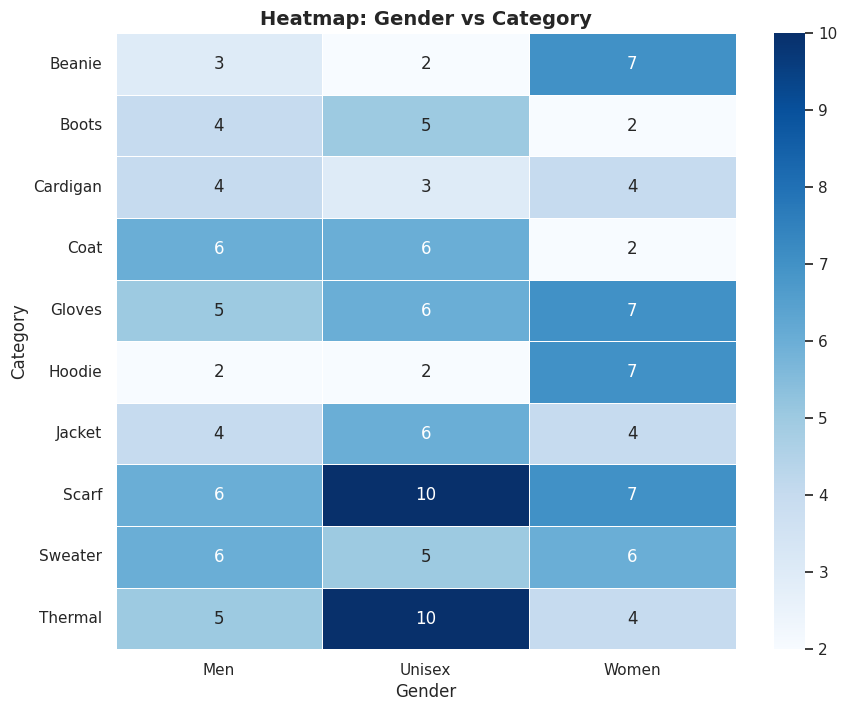

In [ ]:
# 2. Gender vs Category (Heatmap)
gender_category = pd.crosstab(Data['Category'], Data['Gender'])
plt.figure(figsize=(10, 8))
sns.heatmap(gender_category, annot=True, fmt='d', cmap="Blues", linewidths=.5)
plt.title('Heatmap: Gender vs Category', fontsize=14, fontweight='bold')
plt.ylabel('Category')
plt.xlabel('Gender')
plt.show()

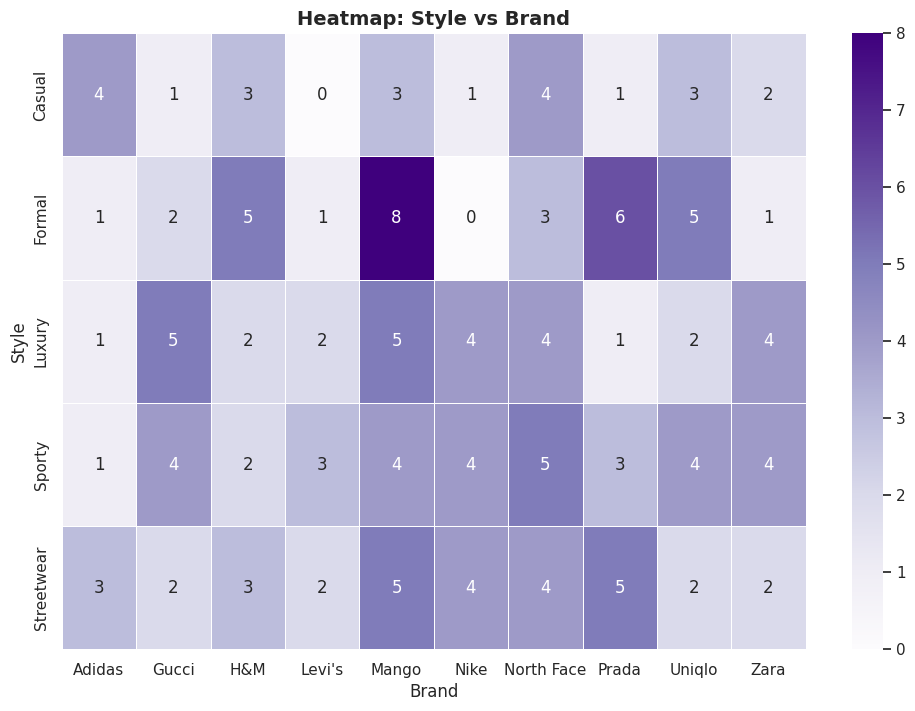

In [ ]:
# 3. Style vs Brand (Heatmap)
style_brand = pd.crosstab(Data['Style'], Data['Brand'])
plt.figure(figsize=(12, 8))
sns.heatmap(style_brand, annot=True, fmt='d', cmap="Purples", linewidths=.5)
plt.title('Heatmap: Style vs Brand', fontsize=14, fontweight='bold')
plt.ylabel('Style')
plt.xlabel('Brand')
plt.show()

# Advanced & Multivariate Analysis

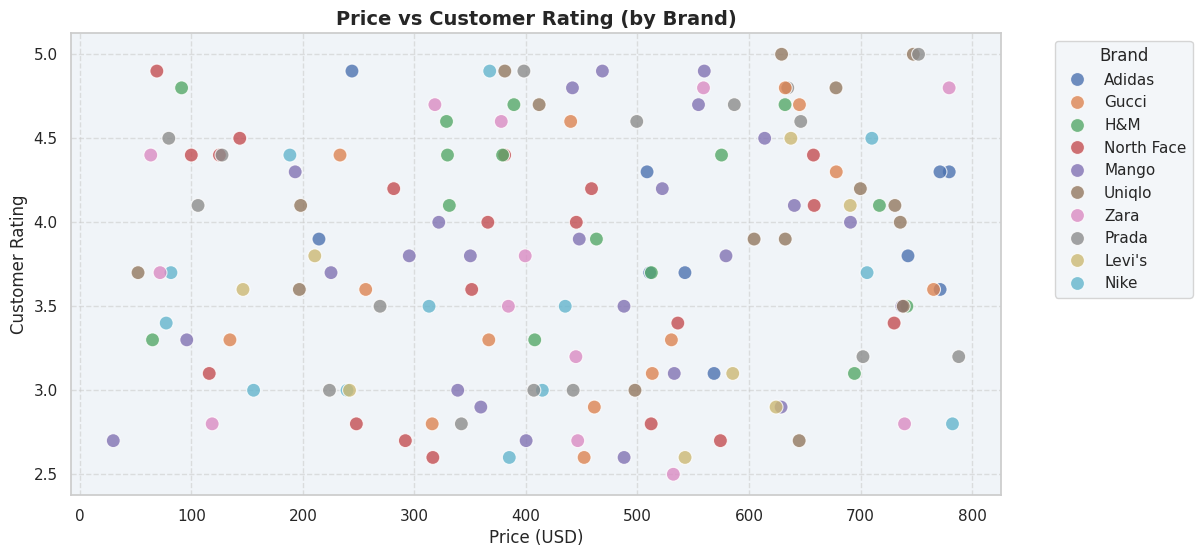

In [ ]:
# 1. Price vs Rating by Brand (Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Data, x='Price(USD)', y='Customer_Rating', hue='Brand', s=100, alpha=0.8, palette='deep')
plt.title('Price vs Customer Rating (by Brand)', fontsize=14, fontweight='bold')
plt.xlabel('Price (USD)')
plt.ylabel('Customer Rating')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

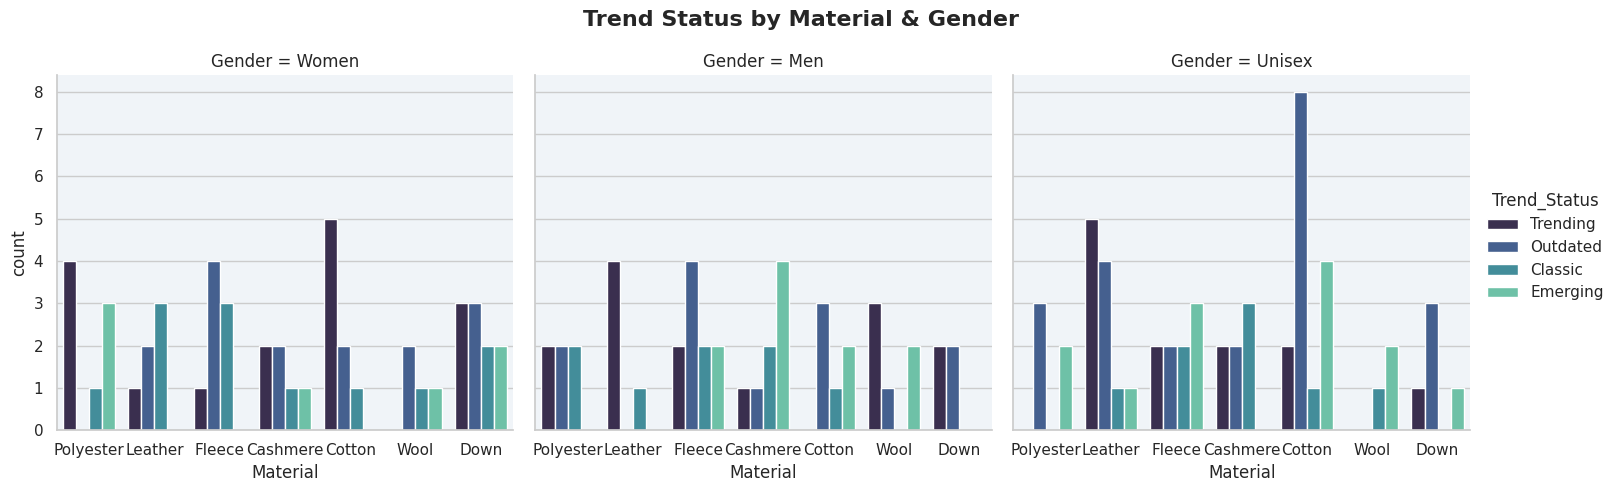

In [ ]:
# 2. Trend Status by Material & Gender (Catplot)
g = sns.catplot(data=Data, x='Material', hue='Trend_Status', col='Gender', kind='count', height=5, aspect=1, palette='mako')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Trend Status by Material & Gender', fontsize=16, fontweight='bold')
plt.show()

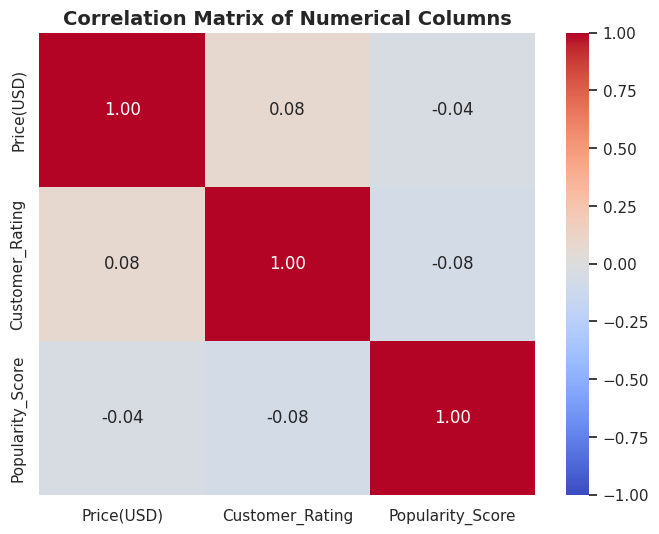

In [ ]:
# 3. Correlation Matrix
numeric_cols = ['Price(USD)', 'Customer_Rating', 'Popularity_Score']
corr_matrix = Data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Columns', fontsize=14, fontweight='bold')
plt.show()

# Recommendations

## Conclusion & Recommendations

Based on the analysis, we have the following takeaways:

1.  **High Price != High Satisfaction:** Brands like **Adidas** have high prices but lower average ratings compared to **Uniqlo**, which offers better value for money.
2.  **Inventory Focus:** The **Scarf** category is highly stocked, while **"Outdated"** trends need to be cleared out.
3.  **Targeting:** Marketing should focus on the Gender-Category preferences identified in the heatmaps (e.g., specific styles for Men vs. Women).

---
*End of Analysis*